# Cars Pricing Forecast

<a id='goto0'></a>
<h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:300%;text-align:center;border-radius: 15px 50px;">Table of Contents</h1>

0. [Table of Contents](#goto0)

1. [Notebook Description](#goto1)

2. [Loading Libraries](#goto2)

3. [Reading Data Files](#goto3)

4. [Data Exploration](#goto4)

5. [Data Modeling](#goto5)

6. [Conclusions](#goto6)

<a id='goto1'></a>
# <h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:300%;text-align:center;border-radius: 15px 50px;">Notebook Description</h1>

## **Description**

### **Goal of the Analysis**

Be able to predict car prices with a strong level of confidence, based on features, such as engine size, curb weight, horsepower, city fuel efficiency (L/100km), and width

### **Context**

Many people may not be familiarized with cars prices, and when it comes down to buying yourself a car, how you will know if the price is acceptable or not? With this model, you will be able to know very confidently if you're making a fair deal.

### **Potential Impact**

Save money when buying cars.

<a id='goto2'></a>
# <h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:300%;text-align:center;border-radius: 15px 50px;">Loading Libraries</h1>

In [99]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy.stats import pearsonr

import warnings; warnings.filterwarnings("ignore")

<a id='goto3'></a>
# <h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:300%;text-align:center;border-radius: 15px 50px;">Reading and Join Data Files</h1>

### Import the main analysis datasets

In [9]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')

In [10]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [11]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [14]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

<a id='goto4'></a>
# <h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:300%;text-align:center;border-radius: 15px 50px;">Data Exploration</h1>

### Replace NaN values

In [27]:
# Replace NaN stroke with median of the dataset
mean_stroke = df['stroke'].median()
df['stroke'] = df['stroke'].replace(np.nan, mean_stroke)

In [31]:
# Replace NaN horsepower-binned with most frequent
most_frequent_horsepower_binned = df['horsepower-binned'].value_counts().idxmax()
df['horsepower-binned'] = df['horsepower-binned'].replace(np.nan, most_frequent_horsepower_binned)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [39]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

### Check correlation between features and price

In [71]:
# Find correlation and p-value to each feature, in respect of Price:

numeric_columns = df.select_dtypes(include='number').columns

correlations = {}

for feature in numeric_columns:
    if feature != 'price':
        corr, p_value = pearsonr(df[feature], df['price'])
        correlations[feature] = {'correlation': corr, 'p-value': p_value}

# Convert the dictionary to a DataFrame for easier manipulation
correlation_df = pd.DataFrame(correlations).T

# Sort the DataFrame by the absolute correlation values
sorted_correlation_df = correlation_df['correlation'].abs().sort_values(ascending=False)

# Get the top 10 features with the highest absolute correlation and their p-values
top_10_features = sorted_correlation_df.head(5).index.tolist()  # Convert to a list

correlation_df.loc[top_10_features]

,correlation,p-value
engine-size,0.872335,9.265492e-64
curb-weight,0.834415,2.189577e-53
horsepower,0.809575,6.369057e-48
city-L/100km,0.789898,3.903106e-44
width,0.751265,9.200336e-38


Based in the correlation, we got the Top 5 with more correlation with price. Now, we can focuse our model in these features.

### Filter only features that are going to be used in the model build

* **engine-size**
* **curb-weight**
* **horsepower**
* **city-L/100km**
* **width**



<a id='goto5'></a>
# <h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:300%;text-align:center;border-radius: 15px 50px;">Data Modeling</h1>

### Extract Features

In [83]:
X = df[['engine-size','curb-weight','horsepower','city-L/100km','width']]
Y = df[['price']]

### Train model

In [84]:
lm = LinearRegression()

In [85]:
lm.fit(X, Y)

LinearRegression()

In [86]:
Yhat = lm.predict(X)

### Find the intercept

In [89]:
b0 = lm.intercept_

### Find the coefficients (b1, b2, b3, b4, b5)

In [93]:
lm.coef_

array([[8.94508609e+01, 1.32881139e+00, 2.50722121e+01, 5.26508941e+02,
        4.07453600e+04]])

#### Unpack the coefficients

In [94]:
coefficients = lm.coef_[0]
b1, b2, b3, b4, b5 = coefficients

print(b1, b2, b3, b4, b5)

89.45086086076012 1.3288113881350432 25.0722120603008 526.5089408721728 40745.36000992716


### Forecast based on training

In [96]:
predicted_prices = pd.DataFrame({'Predicted_Price': Yhat.flatten()})
predicted_prices.head()

,Predicted Price
0,13310.594451
1,13310.594451
2,18134.511031
3,11378.017874
4,16597.909258
...,...
196,17110.629798
197,19468.791875
198,22048.549124
199,16999.273501


### Visualize results

In [101]:
mae = mean_absolute_error(Y, Yhat)
mse = mean_squared_error(Y, Yhat)
rmse = np.sqrt(mse)
r2 = r2_score(Y, Yhat)

# Display metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error: 2371.633225359836
Mean Squared Error: 11272703.179511614
Root Mean Squared Error: 3357.484650674015
R-squared (R2): 0.8206173413241201


#### Distribution Plot

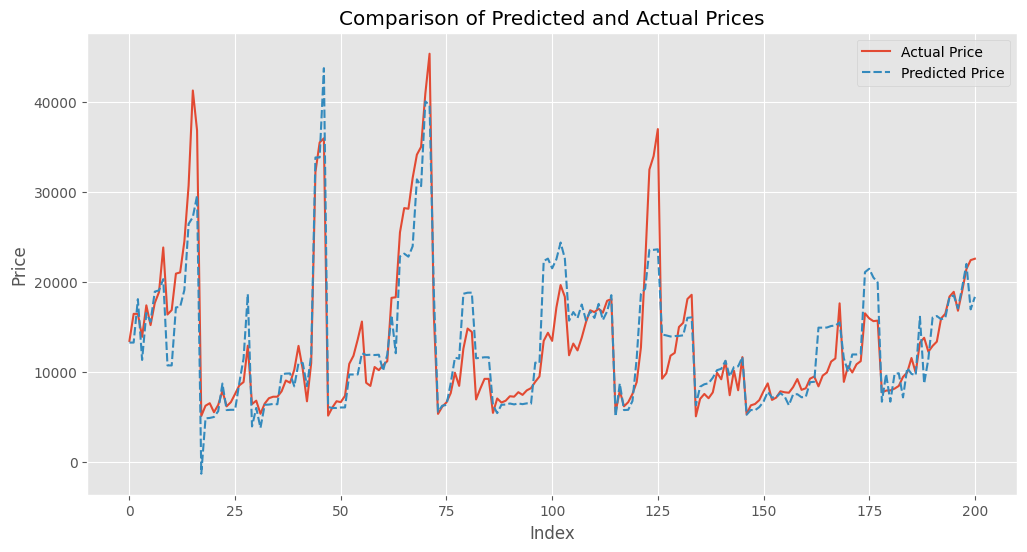

In [115]:
prediction_df = pd.DataFrame({'Actual Price': Y['price'].values, 'Predicted Price': Yhat.flatten()})

# Line plot comparing predicted and actual prices using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=prediction_df[['Actual Price', 'Predicted Price']])
plt.title('Comparison of Predicted and Actual Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

<a id='goto6'></a>
# <h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:300%;text-align:center;border-radius: 15px 50px;">Conclusions</h1>

- **Model Overview:**
    - Linear regression model with key features: engine size, curb weight, horsepower, city fuel efficiency (L/100km), and width.
    - Demonstrates robustness by capturing 82% of variance in car prices (R-squared value).
- **Predictive Accuracy Metrics:**
    - **Mean Absolute Error (MAE):** Approximately $2371.63, indicating the average absolute difference between predicted and actual prices.
    - **Mean Squared Error (MSE):** Approximately 11272703.18, offering insights into how well the model handles larger errors.
- **Efficiency and Practical Utility:**
    - Efficient in approximating fair car prices with a concise set of features.
    - Practical and reasonably accurate estimation, providing quick insights into potential pricing.
- **Model Evaluation:**
    - Achieves a balance between simplicity and accuracy, utilizing only five features out of 29.
    - Commendable efficiency, especially given the complexities of the car market and pricing dynamics.
- **Conclusion:**
    - While not achieving 100% accuracy, the model serves as a valuable tool for estimating car prices.
    - Practical, efficient, and reliable, particularly for those seeking a quick approximation based on essential features.
    - Strikes a balance between simplicity and accuracy, making it a pragmatic solution in the dynamic world of car transactions.